# What we do?

신용 거래 실적을 확인해서 대출을 해줘도 괜찮은지 보자.

* 전자사인을 하면 대출에 관심이 있다는 의미

In [111]:
dataset = pd.read_csv("./data/P39-Financial-Data/P39-Financial-Data.csv")
dataset.drop(['entry_id'],1,inplace=True)

In [36]:
dataset.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.7374,0.9035,0.4877,0.5160,0.5809,0.3809,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.7385,0.8810,0.7134,0.8264,0.7307,0.6307,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.6430,0.7666,0.5950,0.7623,0.5317,0.5317,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.6652,0.9608,0.7678,0.7788,0.7926,0.5926,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.6174,0.8576,0.6135,0.6655,0.7446,0.7446,12,0


* entry_id : 아이디 (이미 제거됨)
* age : 나이
* pay_schedule : 돈을 받는 빈도
* home_owner : 자기 소유 집
* income : 소득
* years_employed : 1년 이상 일 했는지의 유무
* current_address_year : 얼마나 거주했는가?
* personal_account_m : 계좌를 몇 개월 간 가지고 있었는가?
* has_debt : 빚 유무
* amount_requested : 원하는 대출 금액
* risk_score : 5개의 점수 집합 ( 금융 및 엔지니어링이 제공하는 리스크 점수 )
* ext_quality_score : P2P 마켓플레이스에서 제공한 점수
* inquries_last_month : 지난 달에 한 문의 수
* e_signed : 전자사인 유무

# EDA

In [37]:
dataset.describe()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000
mean,43.0154,0.4252,3657.2147,1.1860,3.5269,3.5847,3.4272,3.5034,0.7954,950.4464,61086.3022,0.6909,0.8783,0.5832,0.7183,0.6231,0.6221,6.4572,0.5383
std,11.8731,0.4944,1504.8901,2.4009,2.2597,2.7519,2.2164,1.9556,0.4034,698.5437,15394.2550,0.0905,0.0546,0.1251,0.1207,0.1397,0.1399,3.6731,0.4985
min,18.0000,0.0000,905.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,350.0000,2100.0000,0.0233,0.4514,0.0167,0.1534,0.0102,0.0066,1.0000,0.0000
25%,34.0000,0.0000,2580.0000,0.0000,2.0000,2.0000,2.0000,2.0000,1.0000,600.0000,49350.0000,0.6410,0.8509,0.5002,0.6337,0.5217,0.5197,4.0000,0.0000
50%,42.0000,0.0000,3260.0000,0.0000,3.0000,3.0000,2.0000,3.0000,1.0000,700.0000,61200.0000,0.6996,0.8810,0.5882,0.7251,0.6259,0.6230,6.0000,1.0000
75%,51.0000,1.0000,4670.0000,1.0000,5.0000,5.0000,5.0000,4.0000,1.0000,1100.0000,72750.0000,0.7529,0.9126,0.6724,0.8067,0.7298,0.7289,8.0000,1.0000
max,96.0000,1.0000,9985.0000,11.0000,16.0000,12.0000,11.0000,15.0000,1.0000,10200.0000,99750.0000,1.0000,0.9990,0.9789,0.9963,0.9702,0.9670,30.0000,1.0000


**Obseravation**

* 18세부터 96세까지 존재한다.
* 대략 60%가 집을 소유하고 있다.
* 수입의 범위가 넓다.
* months_employed에서 평균적으로 한 달동안 일을 했고, 일을 하지 않는 사람도 존재한다.
* 평균 3년을 일했으며, 최대 16년까지 일한 사람들이 존재한다.
* personal_account_m의 min을 보았을 떄, 계좌를 가지고 있는 사람이 존재한다.
* has_debt를 통해 80%가 빚을 가지고 있는 것을 볼 수 있다.
* amount_requested에 상당한 액수를 요구하고 있는 것을 볼 수 있다.
* inquiries_last_month를 통해 최소 1건은 문의했음을 볼 수 있다.

In [38]:
dataset.isnull().sum()

age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [39]:
dataset.shape

(17908, 20)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   17908 non-null  int64  
 1   pay_schedule          17908 non-null  object 
 2   home_owner            17908 non-null  int64  
 3   income                17908 non-null  int64  
 4   months_employed       17908 non-null  int64  
 5   years_employed        17908 non-null  int64  
 6   current_address_year  17908 non-null  int64  
 7   personal_account_m    17908 non-null  int64  
 8   personal_account_y    17908 non-null  int64  
 9   has_debt              17908 non-null  int64  
 10  amount_requested      17908 non-null  int64  
 11  risk_score            17908 non-null  int64  
 12  risk_score_2          17908 non-null  float64
 13  risk_score_3          17908 non-null  float64
 14  risk_score_4          17908 non-null  float64
 15  risk_score_5       

*before starting analysis, split dataset.*

In [112]:
train = dataset[5970:]
test = dataset[:5970]
test_target = test['e_signed']
test.drop(['e_signed'],1,inplace=True)

In [42]:
train.shape, test.shape

((11938, 20), (5970, 19))

---

# EDA

In [113]:
int_cols = train.select_dtypes(include='int64').columns.tolist()
float_cols = train.select_dtypes(include='float64').columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()
int_cols.remove('e_signed')

In [99]:
def plot_distribution(data,features, hue='target',ncols=3, method='hist'):
    nrows = round(len(features)/ncols)
    f, ax = plt.subplots(nrows, ncols, figsize=(16, round(nrows*16/ncols)))
    col_i, row_i = 0,0
    for i, feature in enumerate(features):
        if method == 'hist':
            sns.kdeplot(data=data, x=feature, hue=hue, ax=ax[row_i][col_i])
        elif method == 'count':
            temp = data.sort_values(feature)
            sns.countplot(data=temp, x= feature, hue=hue, ax=ax[row_i][col_i])
        elif method == 'bar':
            temp = data.copy()
            temp['counts'] = 1
            temp = temp.groupby([hue,feature], as_index=False).agg({'counts':'sum'})
            sns.barplot(data=temp, x=feature, y= 'counts', hue=hue, ax=ax[row_i][col_i])
        col_i +=1
        if col_i == ncols:
            col_i=0
            row_i+= 1
    plt.tight_layout()

## Int Variables

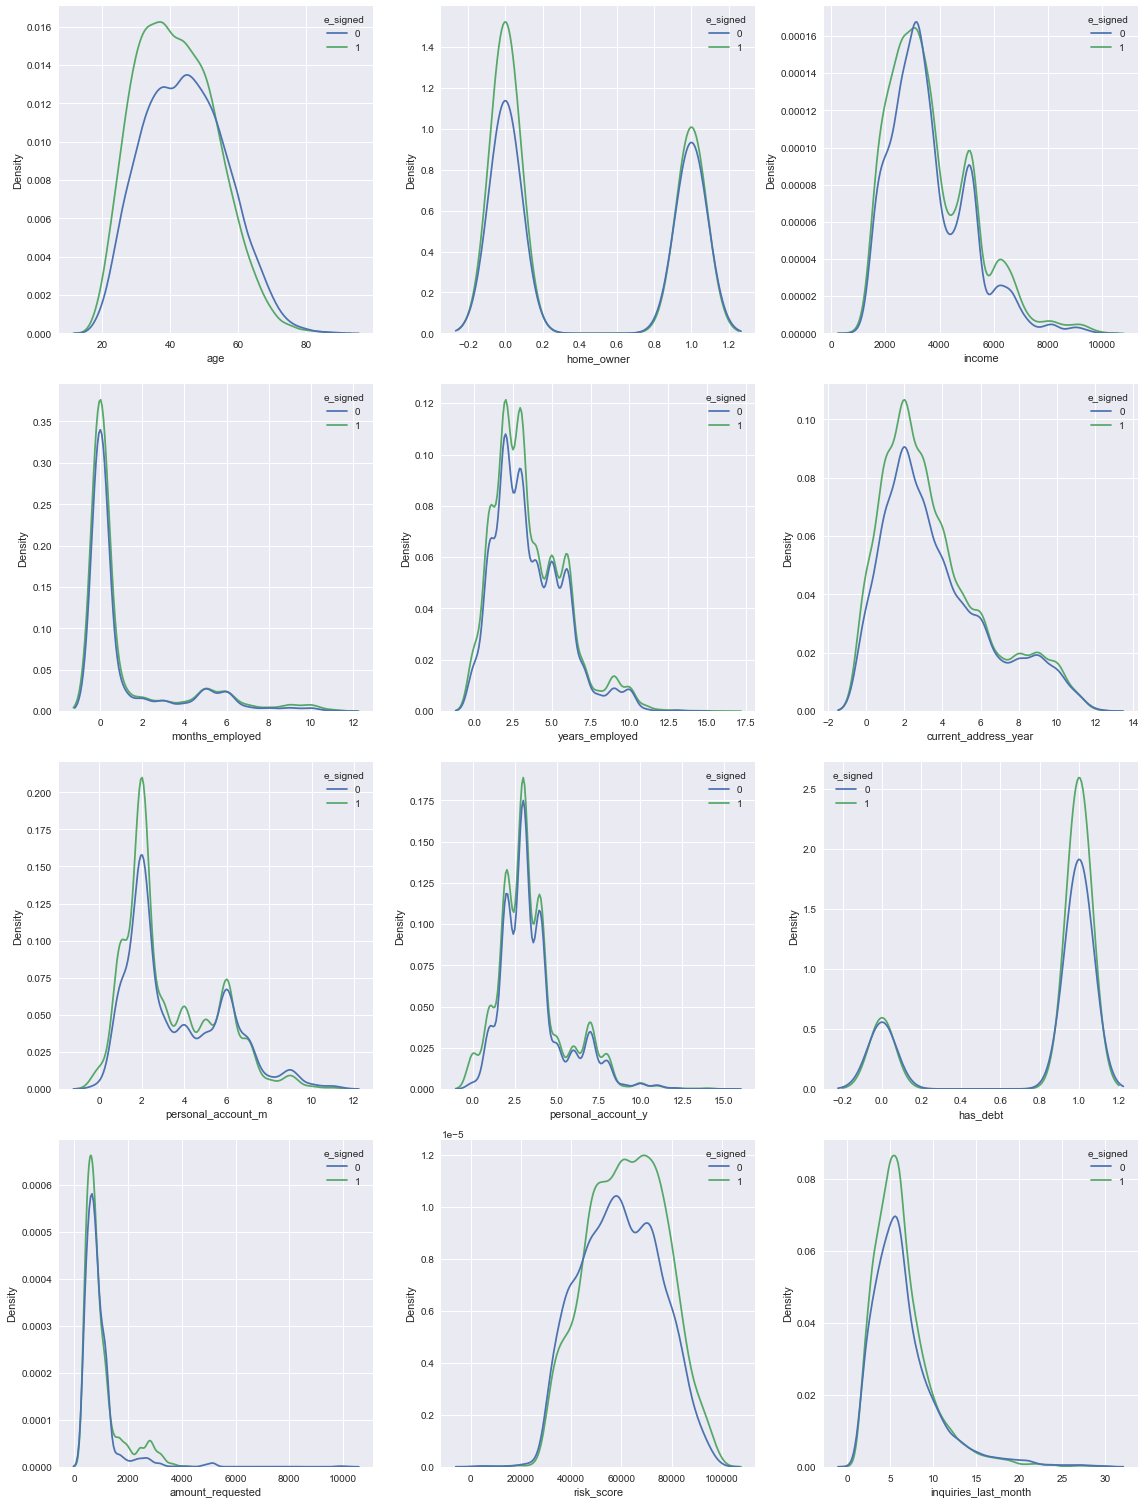

In [100]:
plot_distribution(train,int_cols, hue='e_signed', ncols=3, method='hist')

**Obseravation**

* 30대에서 50대까지에서 대출을 요구한다.
* 자가를 소유하지 않은 사람들이 대출을 요구한다.
* 계좌를 두 달째 가진사람들이 대출을 요구한다. 왜?
* 빚이 있는데 또 대출을 한다.
* risk score에서 뚜렷한 차이를 볼 수 있다.
* 정규화가 필요해보인다.

## Float variables

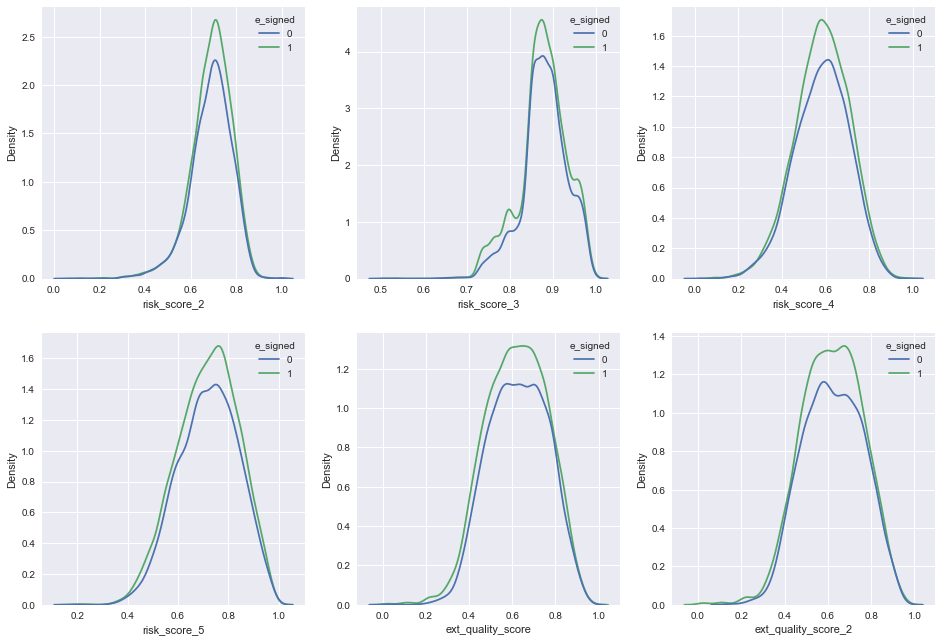

In [32]:
plot_distribution(train,float_cols, hue='e_signed', ncols=3, method='hist')

**Obseravation**

* 대출을 요구한 사람들 모두 상대적으로 리스크 점수가 높음을 볼 수 있다.

## Categorical Variables

<AxesSubplot:xlabel='pay_schedule', ylabel='count'>

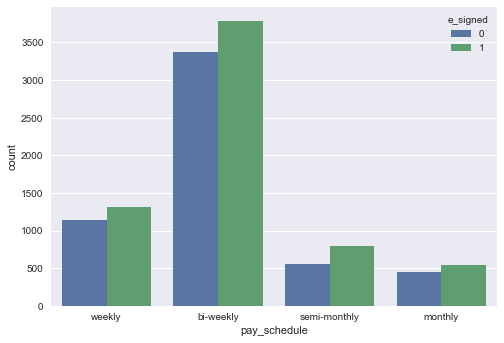

In [66]:
sns.countplot(train['pay_schedule'],hue=train['e_signed'])

**Obseravation**

* 격주로 급여를 받는 경우가 많다.

# Heatmap

<AxesSubplot:>

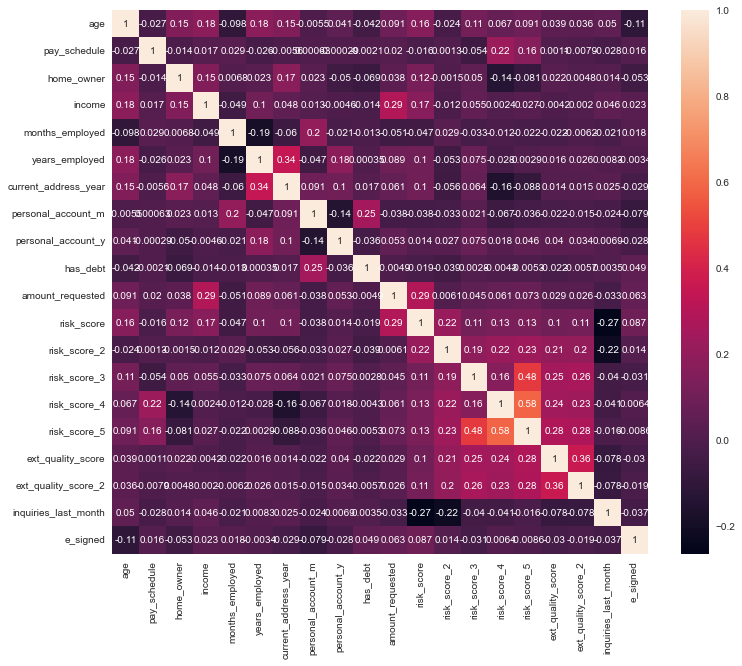

In [79]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True)

# Model

In [80]:
le = LabelEncoder()
train['pay_schedule'] = le.fit_transform(train['pay_schedule'])
test['pay_schedule'] = le.transform(test['pay_schedule'])

X= train.drop(['e_signed'],1)
y= train['e_signed']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.3, random_state=42)

In [83]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(random_state=42)

clf.fit(X_train,y_train)

pred = clf.predict(X_test)

accuracy_score(pred,y_test)

0.6331658291457286

# Feature Importacne

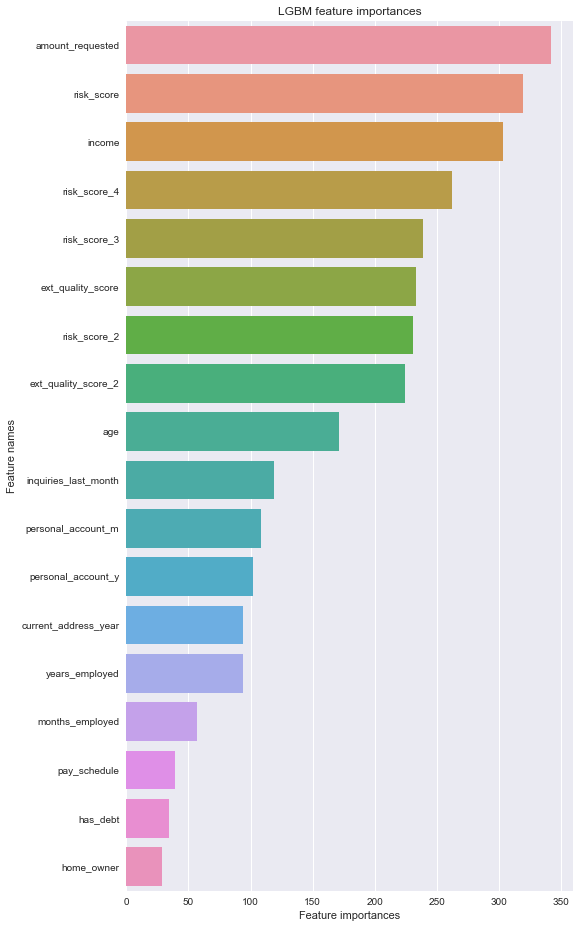

In [92]:
#feature Importance
def plot_feature_importance(importance, names, model_type,figsize=(10,8)):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by='feature_importance',ascending=False,inplace=True)
    plt.figure(figsize=figsize)
    sns.barplot(x=fi_df['feature_importance'],y=fi_df['feature_names'])
    
    plt.title(model_type + ' feature importances')
    plt.xlabel('Feature importances')
    plt.ylabel('Feature names')
    
plot_feature_importance(clf.feature_importances_, X_train.columns, 'LGBM',figsize=(8,16))

* 대출을 요구하는 금액이 target에 큰 영향을 미친다.

---

# 또 다른 방법

In [1]:
dataset = pd.read_csv("./data/P39-Financial-Data/P39-Financial-Data.csv")

In [118]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.7374,0.9035,0.4877,0.5160,0.5809,0.3809,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.7385,0.8810,0.7134,0.8264,0.7307,0.6307,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.6430,0.7666,0.5950,0.7623,0.5317,0.5317,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.6652,0.9608,0.7678,0.7788,0.7926,0.5926,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.6174,0.8576,0.6135,0.6655,0.7446,0.7446,12,0


In [119]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000,17908.0000
mean,5596977.6161,43.0154,0.4252,3657.2147,1.1860,3.5269,3.5847,3.4272,3.5034,0.7954,950.4464,61086.3022,0.6909,0.8783,0.5832,0.7183,0.6231,0.6221,6.4572,0.5383
std,2562472.7507,11.8731,0.4944,1504.8901,2.4009,2.2597,2.7519,2.2164,1.9556,0.4034,698.5437,15394.2550,0.0905,0.0546,0.1251,0.1207,0.1397,0.1399,3.6731,0.4985
min,1111398.0000,18.0000,0.0000,905.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,350.0000,2100.0000,0.0233,0.4514,0.0167,0.1534,0.0102,0.0066,1.0000,0.0000
25%,3378998.7500,34.0000,0.0000,2580.0000,0.0000,2.0000,2.0000,2.0000,2.0000,1.0000,600.0000,49350.0000,0.6410,0.8509,0.5002,0.6337,0.5217,0.5197,4.0000,0.0000
50%,5608376.0000,42.0000,0.0000,3260.0000,0.0000,3.0000,3.0000,2.0000,3.0000,1.0000,700.0000,61200.0000,0.6996,0.8810,0.5882,0.7251,0.6259,0.6230,6.0000,1.0000
75%,7805624.2500,51.0000,1.0000,4670.0000,1.0000,5.0000,5.0000,5.0000,4.0000,1.0000,1100.0000,72750.0000,0.7529,0.9126,0.6724,0.8067,0.7298,0.7289,8.0000,1.0000
max,9999874.0000,96.0000,1.0000,9985.0000,11.0000,16.0000,12.0000,11.0000,15.0000,1.0000,10200.0000,99750.0000,1.0000,0.9990,0.9789,0.9963,0.9702,0.9670,30.0000,1.0000


In [123]:
##cleaning data

dataset.isna().any() #dataset.isnull().sum()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

## Histogram

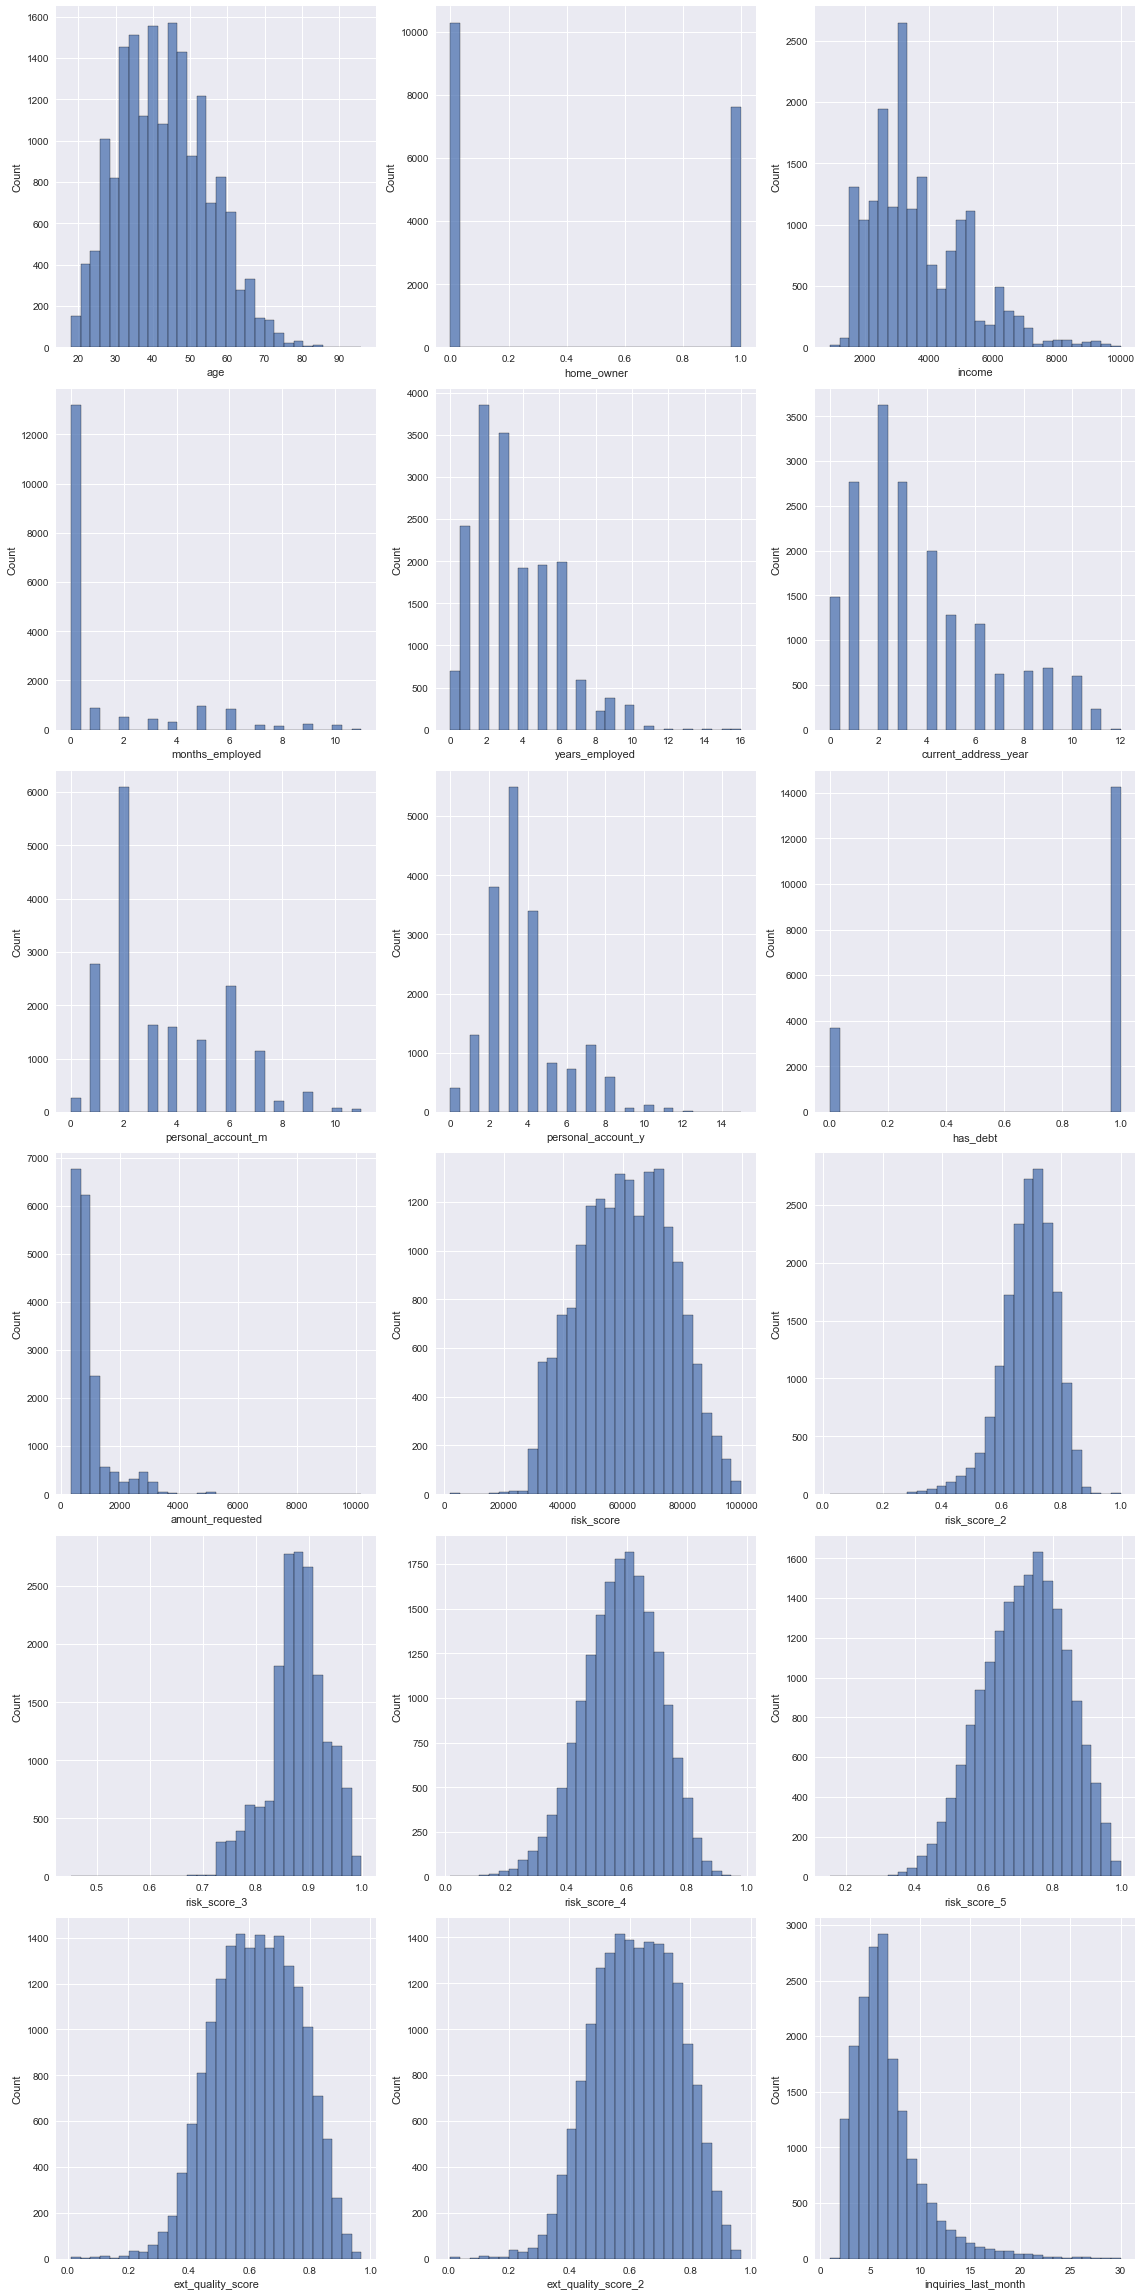

In [148]:
def plot_distribution(data,features,ncols=3, method='hist'):
    nrows = round(len(features)/ncols)
    f, ax = plt.subplots(nrows, ncols, figsize=(16, round(nrows*16/ncols)))
    col_i, row_i = 0,0
    for i, feature in enumerate(features):
        if method == 'hist':
            sns.histplot(data=data, x=feature, ax=ax[row_i][col_i], bins=30)
        elif method == 'count':
            temp = data.sort_values(feature)
            sns.countplot(data=temp, x= feature,  ax=ax[row_i][col_i])
        elif method == 'bar':
            temp = data.copy()
            temp['counts'] = 1
            temp = temp.groupby([hue,feature], as_index=False).agg({'counts':'sum'})
            sns.barplot(data=temp, x=feature, y= 'counts',  ax=ax[row_i][col_i])
        col_i +=1
        if col_i == ncols:
            col_i=0
            row_i+= 1
    plt.tight_layout()
    
plot_distribution(dataset2,dataset2.columns,ncols=3, method='hist')

## 상관그래프

<AxesSubplot:title={'center':'Correaltion with e_signed'}>

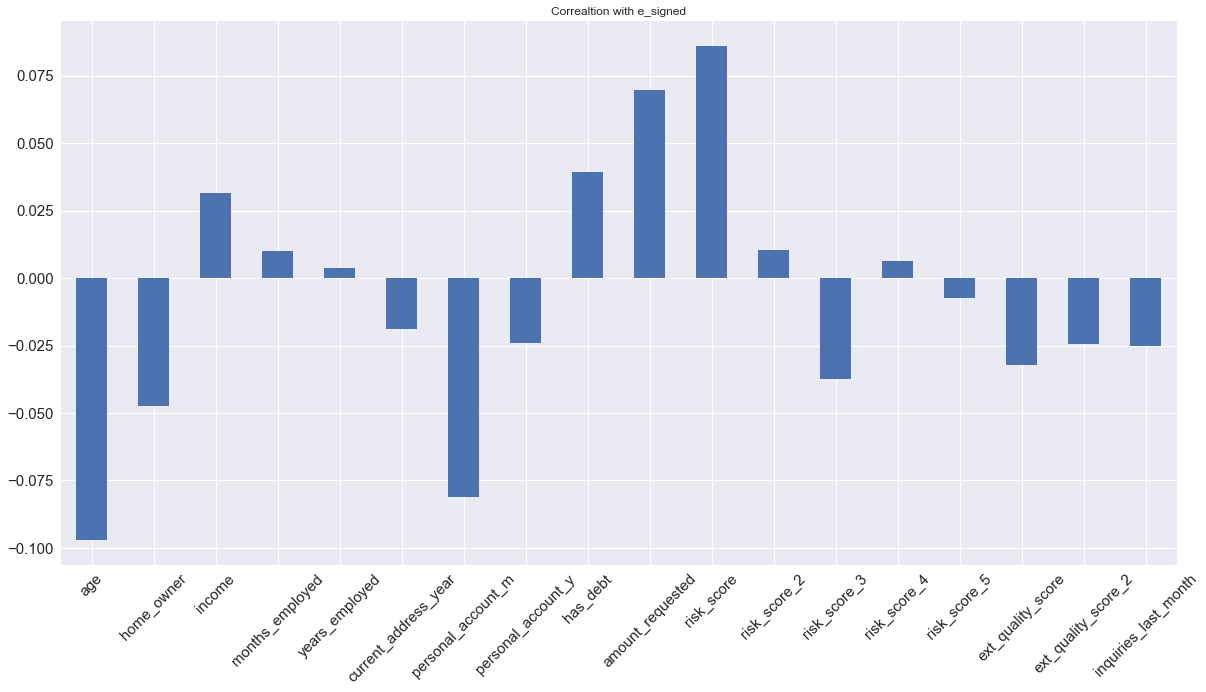

In [155]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize = (20,10), title= 'Correaltion with e_signed', fontsize=15,
                                            rot=45, grid=True)

## 상관행렬(필드간 관계)

<AxesSubplot:>

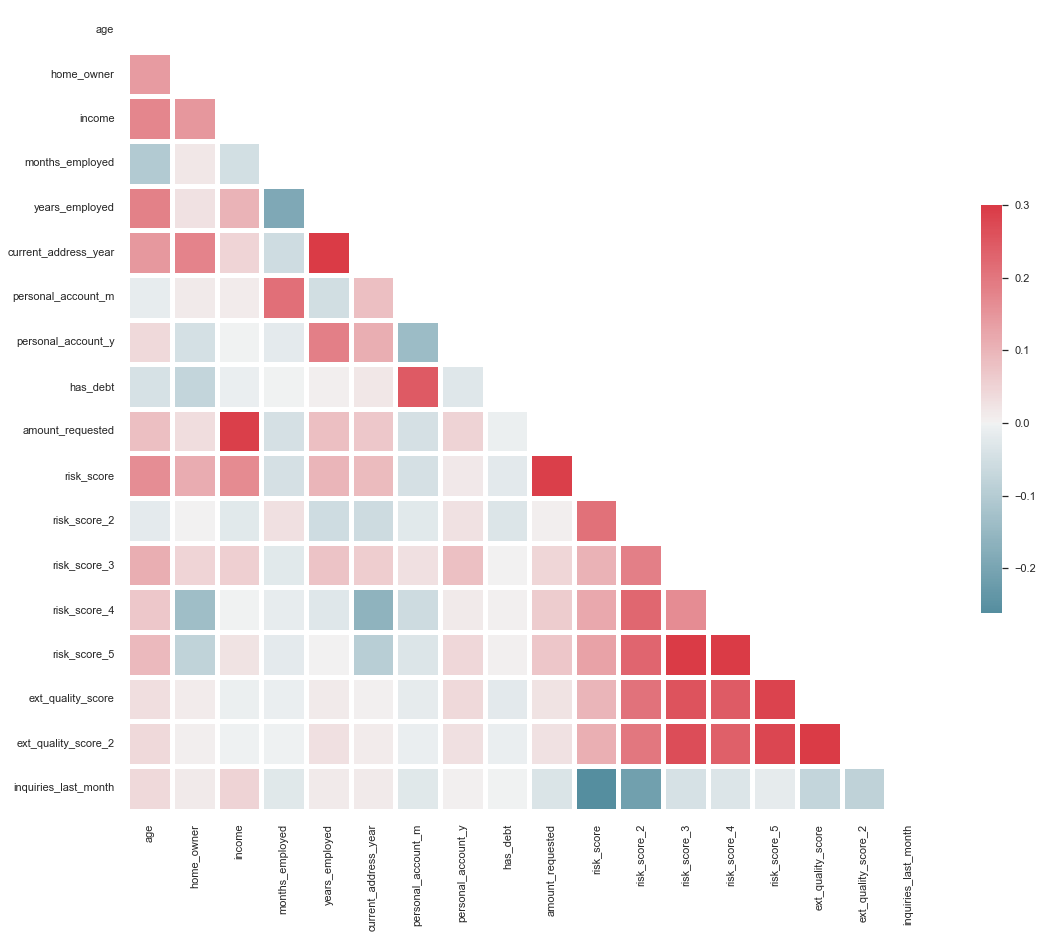

In [167]:
sns.set(style='white')

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=5, cbar_kws={'shrink':.5})

# Feature Engineering

In [170]:
import random
import time

random.seed(100)

1. 이상한 열 제거

In [171]:
dataset = dataset.drop(columns=['months_employed'])

In [2]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m','personal_account_y','personal_account_months']]

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98
...,...,...,...
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18


In [175]:
dataset.drop(columns=['personal_account_m','personal_account_y'],inplace=True)

# one-hot

In [3]:
#One hot Encoding

dataset = pd.get_dummies(dataset)

**이대로 쓰면 선형 독립이 일어나지 않는다. get_dummies에서 한 개를 없애주자.**

In [4]:
dataset=dataset.drop(columns=['pay_schedule_semi-monthly'])

In [5]:
target = dataset['e_signed']

In [6]:
users = dataset['entry_id']
dataset = dataset.drop(['entry_id','e_signed'],axis=1)

In [7]:
#split into train, and test

X_train,X_test,y_train,y_test = train_test_split(dataset, target, test_size=.2, random_state=0)

In [8]:
#scaling

ss = StandardScaler()

X_train2 = pd.DataFrame(ss.fit_transform(X_train)) #더미변수도 취급해주네.
X_test2 = pd.DataFrame(ss.transform(X_test))

In [9]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [10]:
X_train = X_train2
X_test = X_test2

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver='liblinear',penalty='l1') #독립변수 간 상관성 제거
clf.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [48]:
y_pred= clf.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score,classification_report


cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred) #모든 예측된 양성 중 바로게 예측한 것이 얼마인가?
recall = recall_score(y_test,y_pred) #실제 양성 중에서 정탐의 수가 얼마인가?
f1 = f1_score(y_test, y_pred)

In [51]:
results = pd.DataFrame([[accuracy,precision,recall,f1]],columns=['accuracy','precision','recall','f1_score'],index=['Log.Reg'])
results

,accuracy,precision,recall,f1_score
Log.Reg,0.5695,0.5829,0.7038,0.6377


* Accuracy : 예측이 얼마나 양성으로, 음성으로 잘 구분을 했는가의 비율
* precision : 예측된 양성 중에서 실제로 양성인 비율
* recall : 실제 양성인 것 데이터 중에서 양성이라고 예측한 비율 
    * precision과 recall은 트레이드오프 관계라서 의미도 반대
* f1_score : precision, recall 조화평균

recall이 높으니 편향된 모델이다.

In [52]:
#SVC

from sklearn.svm import SVC

clf =SVC(random_state=0,kernel='linear')
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

results= results.append(pd.DataFrame([[accuracy,precision,recall,f1]],columns=['accuracy','precision','recall','f1_score'],index=['svc']))
results

,accuracy,precision,recall,f1_score
Log.Reg,0.5695,0.5829,0.7038,0.6377
svc,0.5717,0.5828,0.7194,0.6439


In [54]:
#RBF
clf =SVC(random_state=0,kernel='rbf')
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

results= results.append(pd.DataFrame([[accuracy,precision,recall,f1]],columns=['accuracy','precision','recall','f1_score'],index=['svc']),ignore_index=True)
results

,accuracy,precision,recall,f1_score
0,0.5695,0.5829,0.7038,0.6377
1,0.5717,0.5828,0.7194,0.6439
2,0.6016,0.6142,0.6987,0.6537


In [55]:
#LGBM
from lightgbm import LGBMClassifier


clf= LGBMClassifier(random_state=0)
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

results= results.append(pd.DataFrame([[accuracy,precision,recall,f1]],columns=['accuracy','precision','recall','f1_score'],index=['svc']),ignore_index=True)
results

,accuracy,precision,recall,f1_score
0,0.5695,0.5829,0.7038,0.6377
1,0.5717,0.5828,0.7194,0.6439
2,0.6016,0.6142,0.6987,0.6537
3,0.6410,0.6523,0.7132,0.6814


# 검증

In [62]:
#K-겹

accuracies = cross_val_score(estimator=clf,X= X_train,y=y_train, cv=10,verbose=-1, n_jobs=-1)
print("LGBM Classifier Accuracy : %.2f(+/- %.2f)" %(accuracies.mean(), accuracies.std()* 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


LGBM Classifier Accuracy : 0.64(+/- 0.03)


* 해당 모델이 학습 세트에 있는 모든 데이터에 일관됨을 거의 보장한다. 이 학습방법에서 모델을 크게 벗어난 train_set은 없다.

In [82]:
# def objectiveLGBM(trial: Trial, X,y,test):
#     param = {
#         'objective':'binary',
#         'metric':'accuracy',
#         'verbosity':-1,
#         'boosting_type':'gbdt',
#         'lambda_l1':trial.suggest_loguniform('lambda_l1',1e-8, 10.0),
#         'lambda_l2':trial.suggest_loguniform('lambda_l2',1e-8, 10.0),
#         'num_leaves':trial.suggest_int('num_leaves',2,512),
#         'learning_rate':0.01,
#         'n_estimators':trial.suggest_int('n_estimators',100,3000),
#         'feature_fraction':trial.suggest_uniform('feature_fraction',0.4,1.0),
#         'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.4,1.0),
#         'bagging_freq':trial.suggest_int('min_child_samples',5,100),
#         'gpu_use_dp':True
#     }
#     X_train,X_test,y_train,y_test =train_test_split(dataset,target, test_size=.3)
    
#     lgbm_clf= LGBMClassifier(**param)
#     lgbm_clf=lgbm_clf.fit(X_train,y_train,verbose=False)
    
#     score=accuracy_score(lgbm_clf.predict(X_test),y_test)
#     return score

# study= optuna.create_study(direction='maximize',sampler=TPESampler())
# study.optimize(lambda trial: objectiveLGBM(trial,dataset,target,X_test), n_trials=20)
# print("Best Trial : score {}, \nparams {}".format(study.best_trial.value, study.best_trial.params))

* 하이퍼 파라미터 튜닝은 시간관계상 패스

In [90]:
final_results = pd.concat([y_test,users],axis=1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id','e_signed','predictions']]

In [91]:
final_results

,entry_id,e_signed,predictions
3629,8825262,1.0000,0
1820,9216889,1.0000,1
6685,1762129,0.0000,1
17241,7249770,1.0000,1
8332,5967375,1.0000,1
...,...,...,...
7546,9384491,1.0000,1
9836,2445124,1.0000,0
7446,6534419,1.0000,1
9526,5501730,1.0000,1


# 마무리

* 해당 비즈니스의 맥략을 이해하고 이 모델을 활용하는 방법을 알고 있는 한 회사는 이윤을 챙길 수 있다.
* 모델이 단순하지만 두려워하지 않아야 한다.